In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV,LeaveOneOut

import ksource_py as ks

In [2]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=3)

In [8]:
# Abrir lista de particulas

folder = "2_bunker_n"
tally = folder+"/2_bunker_n.out"
trasl = None # [118.5497276, -102.897199, 5.0]
rot = None # [0.0, 0.0, -158*np.pi/180.0]
start = "SCORE NAME : mapa_dosis_ph"
end = "number of batches used"

set_params = True
plist = ks.PList(ks.T4tally_read, tally, trasl=trasl, rot=rot, set_params=set_params, start=start, end=end)
if set_params:
    print("N =", plist.N)
    print("I =", plist.I)
    print("err =", np.sqrt(plist.p2))

Reading file 2_bunker_n/2_bunker_n.out ...
Done
N = 227520
I = 0.11240558126046465
err = 0.0006006571712321529


In [9]:
# Crear KSource

J = 3.669E+15
metric = ks.Vol()
s = ks.KSource(metric, bw=[3.,3.,3.], J=J)

In [10]:
# Ajustar KSource

N = -1 # Cantidad de particulas a utilizar
s.fit(plist=plist, N=N)
print(s.bw)
#s.bw /= 5 # Para graficos integrales puede usarse una bw mas baja

Usando 196344 particulas para entrenamiento
[3. 3. 3.]


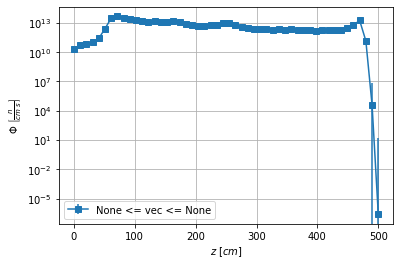

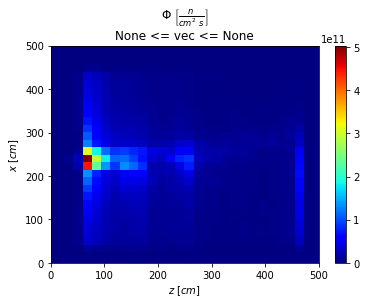

In [11]:
# Graficos en xz

zz = np.linspace(0,500,50)
fig,scores = s.plot_integr(zz, "z")
plt.show()

zz = np.linspace(0,500,30)
xx = np.linspace(0,500,30)
fig,scores = s.plot2D_integr([zz,xx], ["z","x"])
plt.show()

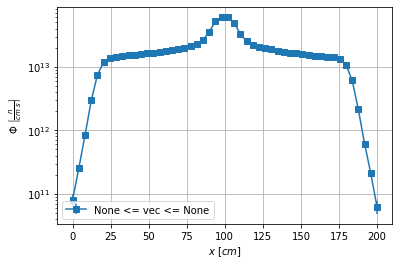

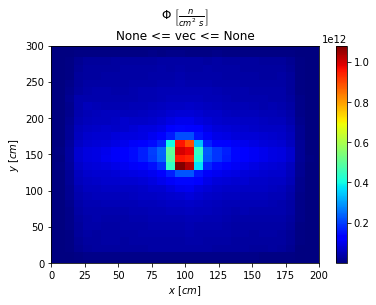

In [28]:
# Graficos en xy

xx = np.linspace(0,200,50)
fig,scores = s.plot_integr(xx, "x")
plt.show()

xx = np.linspace(0,200,30)
yy = np.linspace(0,300,30)
fig,scores = s.plot2D_integr([xx,yy], ["x","y"])
plt.show()